In [3]:
import os
import json
import pandas as pd
import pickle as pkl
from glob import glob

path_image = "/mnt/disks/imagenet-captions/imagenet"
path_captions = "/mnt/disks/imagenet-captions/eval-on-laion/imagenet-captions/imagenet_captions.json"
generated_labels = "/mnt/disks/imagenet-captions/eval-on-laion/imagenet-captions/processed/labels/icimagename2wnid.pkl"
generated_captions = "/mnt/disks/imagenet-captions/eval-on-laion/imagenet-captions/imagenet_captions.parquet"

In [4]:
# load path_captions
with open(path_captions, 'r') as f:
    data = json.load(f)
data[0]

{'filename': 'n03146219_12646.JPEG',
 'title': 'Medioeval Costume',
 'tags': ['Medioevo',
  'corazza',
  'costume',
  'ferro',
  'FedeSK8',
  'Nikon',
  'D80'],
 'description': '',
 'wnid': 'n03146219'}

In [5]:
images = glob(os.path.join(path_image, "*.jpg"))
len(images)

0

In [6]:
df = pd.read_parquet(generated_captions)
df.head()

,TEXT
ic_index,
n01440764_10040.JPEG,ASHLEY WITH GOLDEN TENCH 13.05.09 Chesnut Pool...
n01440764_10323.JPEG,rudd/bream or rudd/roach hybrid? water ruddroa...
n01440764_105.JPEG,Tench fishing tench
n01440764_10531.JPEG,My 2nd Tench (4.8Lb) fishing tench fish wyresi...
n01440764_10548.JPEG,TENCH Decoy Lakes Whittlesey Summer Holiday Ac...


In [7]:
df["TEXT"]

ic_index
n01440764_10040.JPEG    ASHLEY WITH GOLDEN TENCH 13.05.09 Chesnut Pool...
n01440764_10323.JPEG    rudd/bream or rudd/roach hybrid? water ruddroa...
n01440764_105.JPEG                                   Tench fishing tench 
n01440764_10531.JPEG    My 2nd Tench (4.8Lb) fishing tench fish wyresi...
n01440764_10548.JPEG    TENCH Decoy Lakes Whittlesey Summer Holiday Ac...
                                              ...                        
n15075141_9725.JPEG     Bathroom Self Portrait self portrait self alon...
n15075141_9790.JPEG     Belgium even has friendly toilet paper Europe ...
n15075141_9819.JPEG     Margaret Thatcher toilet paper Margaret Thatch...
n15075141_9942.JPEG     Toilet Roll II toilet roll II toilet roll duan...
n15075141_9993.JPEG     Toilet Paper toilet paper flush light green wa...
Name: TEXT, Length: 443798, dtype: object

In [24]:
from tqdm import tqdm

# move images to the target_path 
target_path = "/mnt/disks/imagenet-captions/eval-on-laion/ilsvrc2012/ILSVRC2012_img_train"
os.makedirs(target_path, exist_ok=True)

# move all the images to the target_path
for img in tqdm(images):
    # if no img, pass
    if not os.path.exists(img):
        print(f"Image {img} does not exist")
        continue
    os.rename(img, os.path.join(target_path, os.path.basename(img)))

  0%|          | 3131/1281167 [00:00<00:40, 31304.28it/s]

Image /mnt/disks/imagenet-captions/imagenet/n03384352_8421.jpg does not exist


100%|██████████| 1281167/1281167 [01:50<00:00, 11562.74it/s]


### Save text files

In [8]:
import os
from glob import glob

selected_train_files = "/mnt/disks/imagenet-captions/eval-on-laion/ilsvrc2012/ILSVRC2012_img_train_selected"
jpg_files = glob(os.path.join(selected_train_files, "*.jpg"))
len(jpg_files)

443798

In [9]:
df.shape

(443798, 1)

In [10]:
import pandas as pd
new_df = pd.DataFrame({"basepath": df["TEXT"].index, "TEXT": df["TEXT"].values})
new_df.head()

,basepath,TEXT
0,n01440764_10040.JPEG,ASHLEY WITH GOLDEN TENCH 13.05.09 Chesnut Pool...
1,n01440764_10323.JPEG,rudd/bream or rudd/roach hybrid? water ruddroa...
2,n01440764_105.JPEG,Tench fishing tench
3,n01440764_10531.JPEG,My 2nd Tench (4.8Lb) fishing tench fish wyresi...
4,n01440764_10548.JPEG,TENCH Decoy Lakes Whittlesey Summer Holiday Ac...


In [11]:
# rename ".JPEG" as "jpg" for basepath columns
new_df["basepath"] = new_df["basepath"].apply(lambda x: x.replace(".JPEG", ".jpg"))
new_df.head()

,basepath,TEXT
0,n01440764_10040.jpg,ASHLEY WITH GOLDEN TENCH 13.05.09 Chesnut Pool...
1,n01440764_10323.jpg,rudd/bream or rudd/roach hybrid? water ruddroa...
2,n01440764_105.jpg,Tench fishing tench
3,n01440764_10531.jpg,My 2nd Tench (4.8Lb) fishing tench fish wyresi...
4,n01440764_10548.jpg,TENCH Decoy Lakes Whittlesey Summer Holiday Ac...


In [12]:
# make new column as fullpath with selected_train_files
new_df["fullpath"] = new_df["basepath"].apply(lambda x: os.path.join(selected_train_files, x))
new_df.head()

,basepath,TEXT,fullpath
0,n01440764_10040.jpg,ASHLEY WITH GOLDEN TENCH 13.05.09 Chesnut Pool...,/mnt/disks/imagenet-captions/eval-on-laion/ils...
1,n01440764_10323.jpg,rudd/bream or rudd/roach hybrid? water ruddroa...,/mnt/disks/imagenet-captions/eval-on-laion/ils...
2,n01440764_105.jpg,Tench fishing tench,/mnt/disks/imagenet-captions/eval-on-laion/ils...
3,n01440764_10531.jpg,My 2nd Tench (4.8Lb) fishing tench fish wyresi...,/mnt/disks/imagenet-captions/eval-on-laion/ils...
4,n01440764_10548.jpg,TENCH Decoy Lakes Whittlesey Summer Holiday Ac...,/mnt/disks/imagenet-captions/eval-on-laion/ils...


In [14]:
# change basepath as basename, remove basepath and extension
new_df["basename"] = new_df["basepath"].apply(lambda x: os.path.basename(x).replace(".jpg", ""))
new_df.head()

,basepath,TEXT,fullpath,basename
0,n01440764_10040.jpg,ASHLEY WITH GOLDEN TENCH 13.05.09 Chesnut Pool...,/mnt/disks/imagenet-captions/eval-on-laion/ils...,n01440764_10040
1,n01440764_10323.jpg,rudd/bream or rudd/roach hybrid? water ruddroa...,/mnt/disks/imagenet-captions/eval-on-laion/ils...,n01440764_10323
2,n01440764_105.jpg,Tench fishing tench,/mnt/disks/imagenet-captions/eval-on-laion/ils...,n01440764_105
3,n01440764_10531.jpg,My 2nd Tench (4.8Lb) fishing tench fish wyresi...,/mnt/disks/imagenet-captions/eval-on-laion/ils...,n01440764_10531
4,n01440764_10548.jpg,TENCH Decoy Lakes Whittlesey Summer Holiday Ac...,/mnt/disks/imagenet-captions/eval-on-laion/ils...,n01440764_10548


In [16]:
imagenet_path = "/mnt/disks/imagenet-captions/imagenet"
cls_paths = glob(os.path.join(imagenet_path, "*.cls"))
json_paths = glob(os.path.join(imagenet_path, "*.json"))
len(cls_paths), len(json_paths)

(1281167, 1281167)

In [ ]:
target_path = "/mnt/disks/imagenet-captions/filtered_imagenet"
os.makedirs(target_path, exist_ok=True)

for idx, row in new_df.iterrows():
    if idx % 1000 == 0:
        print(f"Processing {idx}th row")
    
    # get cls file
    cls_file = os.path.join(imagenet_path, row["basename"] + ".cls")
    # get json file
    json_file = os.path.join(imagenet_path, row["basename"] + ".json")
    # get jpg file
    jpg_file = row["fullpath"]
    # check if cls file exists
    if os.path.exists(cls_file):
        os.rename(cls_file, os.path.join(target_path, os.path.basename(cls_file)))
    # check if json file exists
    if os.path.exists(json_file):
        os.rename(json_file, os.path.join(target_path, os.path.basename(json_file)))
    # check if jpg file exists
    if os.path.exists(jpg_file):
        os.rename(jpg_file, os.path.join(target_path, os.path.basename(jpg_file)))

In [22]:
# check cls, json, jpg files
cls_files = glob(os.path.join(target_path, "*.cls"))
json_files = glob(os.path.join(target_path, "*.json"))
jpg_files = glob(os.path.join(target_path, "*.jpg"))

assert len(cls_files) == len(json_files) == len(jpg_files) == len(new_df)

In [24]:
# save text as .txt files on target files with same basename
for idx, row in new_df.iterrows():
    if idx % 10000 == 0:
        print(f"Processing {idx}th row")
    
    # get text
    text = row["TEXT"]
    
    # save text as .txt file
    with open(os.path.join(target_path, row["basename"] + ".txt"), 'w') as f:
        f.write(text)

Processing 0th row
Processing 10000th row
Processing 20000th row
Processing 30000th row
Processing 40000th row
Processing 50000th row
Processing 60000th row
Processing 70000th row
Processing 80000th row
Processing 90000th row
Processing 100000th row
Processing 110000th row
Processing 120000th row
Processing 130000th row
Processing 140000th row
Processing 150000th row
Processing 160000th row
Processing 170000th row
Processing 180000th row
Processing 190000th row
Processing 200000th row
Processing 210000th row
Processing 220000th row
Processing 230000th row
Processing 240000th row
Processing 250000th row
Processing 260000th row
Processing 270000th row
Processing 280000th row
Processing 290000th row
Processing 300000th row
Processing 310000th row
Processing 320000th row
Processing 330000th row
Processing 340000th row
Processing 350000th row
Processing 360000th row
Processing 370000th row
Processing 380000th row
Processing 390000th row
Processing 400000th row
Processing 410000th row
Proces

Great white shark great white shark south australia scubazoo jason isley fox tours 
2


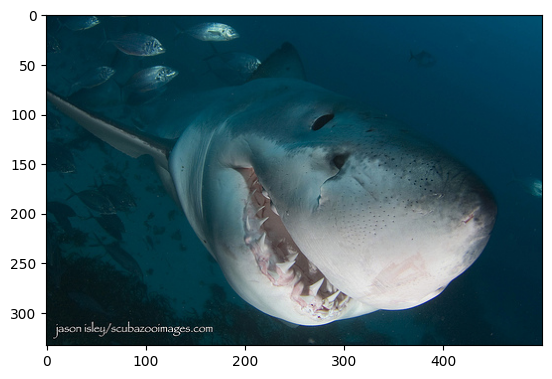

In [33]:
# check if the files are correctly moved
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_idx = 1000
sample_row = new_df.iloc[sample_idx]

basename = sample_row["basename"]
sample_img = mpimg.imread(os.path.join(target_path, basename + ".jpg"))
sample_text = open(os.path.join(target_path, basename + ".txt"), 'r').read()
sample_cls = open(os.path.join(target_path, basename + ".cls"), 'r').read()

print(sample_text)
print(sample_cls)
plt.imshow(sample_img)

In [34]:
import os
import tarfile
from glob import glob
from tqdm import tqdm

src_path = "/mnt/disks/imagenet-captions/filtered_imagenet"
tgt_path = "/mnt/disks/imagenet-captions/filtered_imagenet_tar"

txt_files = glob(os.path.join(src_path, "*.txt"))
jpg_files = glob(os.path.join(src_path, "*.jpg"))
cls_files = glob(os.path.join(src_path, "*.cls"))
json_files = glob(os.path.join(src_path, "*.json"))

txt_files.sort()
jpg_files.sort()
cls_files.sort()
json_files.sort()

assert len(txt_files) == len(jpg_files) == len(cls_files) == len(json_files)
print(f"Total files: {len(txt_files)}")

batch_size = 1200
for idx in tqdm(range(0, len(txt_files), batch_size)):
  with tarfile.open(os.path.join(tgt_path, f"imagenet1k-caption-train-{idx//batch_size:03d}.tar"), 'w') as tar:
    # Get a slice of 1200 files (or the remainder if less than 1200 left)
    for txt_file, jpg_file, cls_file, json_file in zip(txt_files[idx:idx+batch_size], jpg_files[idx:idx+batch_size], cls_files[idx:idx+batch_size], json_files[idx:idx+batch_size]):
        # Add txt and jpg files to the tar
        tar.add(txt_file, os.path.basename(txt_file))
        tar.add(jpg_file, os.path.basename(jpg_file))
        tar.add(cls_file, os.path.basename(cls_file))
        tar.add(json_file, os.path.basename(json_file))

        # assert the files are added
        assert os.path.splitext(txt_file)[0] == os.path.splitext(jpg_file)[0] == os.path.splitext(cls_file)[0] == os.path.splitext(json_file)[0]

print("Done")

Total files: 443798


100%|██████████| 370/370 [06:44<00:00,  1.09s/it]

Done


In [3]:
import os
from glob import glob

# rename *.tar files in "/mnt/disks/imagenet-captions/filtered_imagenet_tar" as replacing "imagenet1k-caption" as "imagenet1k-captions"
tgt_path = "/mnt/disks/imagenet-captions/filtered_imagenet_tar"
tar_files = glob(os.path.join(tgt_path, "*.tar"))
for tar_file in tar_files:
    os.rename(tar_file, tar_file.replace("imagenet1k-caption", "imagenet1k-captions"))